<a href="https://colab.research.google.com/github/MauricioCosta-Psico/MeusProjetosDS/blob/master/NBA_An%C3%A1lise_dados_1947_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados da NBA

<center><img src="https://images.vectorhq.com/images/previews/dde/nba-logo-psd-470981.png" height=250px>

Este _notebooK_ se baseia em um artigo publicado no site [Real Python](https://realpython.com/pandas-python-explore-dataset/) onde eles utilizam um banco de dados da _**`National Basketball Association`**_ disponibilizado pelo [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/nba-elo).

Pra quem procura base de dados é interessantes dar uma olhada no GitHub do FiveThirdyEight ou no site deles [FiveThirdyEight](https://fivethirtyeight.com/)

In [1]:
# Importando as bibliotecas que iremos utilziar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Será importado o arquivo diretamente do repositório do GitHub. Com isso, não é necessário manter uma cópia do arquivo em sua máquina e quando é realizado um _update_ dos dados, automaticamente temos acesso à atualização!

In [2]:
# Importando os dados direto do repositório do GitHub
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
nba = pd.read_csv(download_url)
type(nba)

pandas.core.frame.DataFrame

In [3]:
# verificando a quantidade de linhas e colunas
nba.shape

(126314, 23)

Agora sabemos que temos 126.314 linhas e 23 colunas.


Vamos verificar o arquivo para saber quais tipos de informações temos.

In [4]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [5]:
# Mostrando todas as colunas (caso não esteja aparecendo).
pd.set_option("display.max.columns", None)
# Mostrando apenas duas casas decimais nas colunas que contém valores.
pd.set_option("display.precision", 2)

Verificando as 5 primeiras e 5 últimas linhas

In [6]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [7]:
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


Acima verificamos que o arquivo possui dados das temporadas de 1947 até 2015. É um arquivo um pouco antigo, mas que vai servir para podermos usar alguns conceitos exploratórios no pandas e numpy.

In [8]:
# Verificando as informações disponíveis (nome das colunas e tipos de dados) 
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

## **Vamos então para o significado de cada coluna**

Cabeçalho | Descrição
:--- | :---
gameorder |	Ordem do jogo na história da NBA
game_id |  Identificação única de cada jogo (unique ID)
lg_id |	Em qual liga o jogo foi disputado
_iscopy | Cada linha de dados está ligada a um único time em um único jogo, então _iscopy sinaliza se este game_id já ocorreu para o time adversário na mesma partida
year_id | A temporada é nomeada com base no ano em que a temporada terminou
date_game | Data do Jogo
seasongame | Número do jogo na temporada
is_playoffs | Sinalização para jogos de playoff
team_id	| Código de três letras para a cidade em que o time joga
fran_id	| Identificação da franquia (Franchise ID). Vários team_ids podem cair no mesmo fran_id devido a mudanças de nome ou cidade
pts | Pontos marcados por time
elo_i	| elo (rating) da equipe entrando no jogo
elo_n	| elo (rating) da equipe após o jogo
win_equiv |	Número equivalente de vitórias em uma temporada de 82 jogos para um time de qualidade elo_n
opp_id	| ID da equipe do adversário
opp_fran |	ID de franquia do oponente
opp_pts	| Pontos marcados pelo oponente
opp_elo_i |	elo (rating) do oponente entrando no jogo
opp_elo_n |	elo (rating) do oponente após o jogo
game_location| 	Em casa (Home - H), Visitante (Away - A), or Neutro (Neutral - N)
game_result	| Vitória ou derrota para o time na coluna team_id
forecast	| Probabilidades baseadas em Elo (rating) de vencer para o time na coluna team_id, com base nas classificações de elo (rating) e localização do jogo
notes |	Informações Adicionais

In [9]:
# Verificando as estatísticas descritivas
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


Neste caso, a estatística descritiva apresentada aneriormente não é de grande ajuda, até pq a maioria dos dados das colunas numéricas é referente ao _Elo Ratings_ da NBA. Mas não irie explorar esta classificação neste _notebook_. Mas se você está curioso e quer conhecer um pouco mais sobre este como é calculado o _Elo Rating_ da NBA, acesse  [este artigo](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/).

Vimos então que ao usar `.describe()` temos como _default_ a análise de apenas colunas numéricas. Mas podemos utilizar o parâmetro `.describe(include=np.object)` do **numpy** para outros tipos de dados, como _strings_.

In [10]:
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,199103020GSW,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,A,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


Podemos ver que existem algumas "discrepâncias" nos dados apresentados, por exemplo:
* Na coluna correspondente à liga (lg_id) temos duas variáveis. Mas não deveria ter somente uma liga, no caso NBA?
* Olhando as colunas team_id e fran_id temos 104 times (team_id) mas apenas 53 franquias (fran_id). Tá faltando franquia aí pro tanto de times no _dataframe_! Por quê isso acontece? 


Bom, vamos explorar um pouco esses dados para entender o que está acontecendo, começando pelas duas variáveis da coluna lg_id.

In [11]:
nba["lg_id"].value_counts()

NBA    118016
ABA      8298
Name: lg_id, dtype: int64

A _American Basketball Association_ foi uma liga concorrente da NBA entre os anos de 1967 a 1976. Em 1976 ela se fundiu com a NBA e um fato curioso é que foi a partir dessa fusão que a NBA passou adotar a linha de 3 pontos. Quatro times da ABA passaram a integrar a NBA sendo que outros foram extintos. Maiores informações podem ser encontradas [aqui](https://pt.wikipedia.org/wiki/American_Basketball_Association_(1967%E2%80%931976) 

<center><img src="https://i.pinimg.com/originals/61/22/8d/61228dcc0c2da533afccfead7ff528d2.gif" height=150px>


Agora vamos analisar a questão dos **Times x Franquias**. Diferente do nosso futebol onde os times são clubes, lá nos EUA os times são franquias, ou seja, você que é cheio da grana compra um time da liga e se torna dono dele e, com o passar dos anos, tem a possibilidade de mudar a Franquia de cidade (visando sempre aumentar o lucro e ganhar mais dinheiro com o seu investimento!) e até mesmo mudar o nome da Franquia.


Vamos ver então algumas Franquias que mudaram de Cidade ao longo dos anos.

In [12]:
# Verificando a cidade do time.
nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
PIT      60
INJ      60
TRH      60
DTF      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [13]:
# Verificando a franquia do time.
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

Sabemos que atualmente a NBA conta com 30 times (29 nos EUA e 1 no Canadá). Observando o _output_ 13 (acima) da **fran_id** podemos ver o nome das 53 franquias do *dataset*. Os 30 primeiros nomes são as Franquias que compõe atualmente a NBA. Os nomes das franquias que estão abaixo de "Hornets" não existem mais.

Analisando os outputs 12 e 13 vemos que as dicrepâncias entre o número de partidas disputadas entre alguns times em relação ao nome do time e à cidade que joga. Como exemplo temos:
* Lakers com 6.024 jogos e LAL (Los Angeles Lakers) com 5.078 jogos
* Pistons com 5.650 jogos e DET (Detroit Pistons) com 4.985 jogos 
* Sixers com 5.644 jogos e PHI (Philadelphia Sixers) com 4.533 jogos

Claro que para fazer essa análise é necessário realizar uma pequena pesquisa em relação à cidade que cada franquia está jogando atualmente e o trigrama correspondente. Por exemplo, os Celtics sempre foram de Boston e o trigrama é **BOS**.

Como eu sou torcedor do Lakers desde a época em que o Magic Johnson jogava, vamos analisar o que ocorreu com este franquia.

In [14]:
# Verificando se o Lakers jogou por outra cidade
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [15]:
# Verificando em quais anos o Lakers jogou por Minneapolis
nba.loc[nba["team_id"] == "MNL", "year_id"].agg(("min", "max"))

min    1949
max    1960
Name: year_id, dtype: int64

In [16]:
# Verificando quando o Lakers começou a jogar por Los Angeles e a fazer história
nba.loc[nba["team_id"] == "LAL", "year_id"].min()

1961

No caso, o que ocorreu foi que as franquias mudaram de cidade, o que é permitido nas Ligas Norte Americanas. Como exemplo, o Lakers iniciou as atividades em Minneapolis (MNL) em 1949 e foi transferido para Los Angeles em 1961, se tornando o Los Angeles Lakers de Magic Johnson, Kobe Bryant, LeBron James e tantos outros grandes jogadores. O mesmo ocorreu com os outros dois times do exemplo anterior (Pistons e Sixers).

Vamos ver quantos pontos a franquia Lakers fez entre 1949 e 2015.

In [17]:
nba.loc[nba["fran_id"] == "Lakers", "pts"].sum()

637444

Até o final da temporada de 2015, o Lakers tinham 637.444 pontos. 

Vamos ver a soma desta pontuação ao longo dos anos.

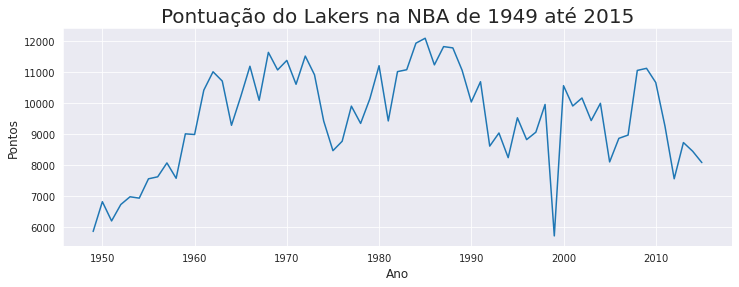

In [18]:
fig,ax = plt.subplots(figsize=(12,4))
nba[nba["fran_id"] == "Lakers"].groupby("year_id")["pts"].sum().plot()
plt.title('Pontuação do Lakers na NBA de 1949 até 2015', fontsize = 20)
plt.ylabel('Pontos', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.show()

O último título da NBA conquistado pelo Lakers foi o da temporada 2009/2010. Vamos ver a quantidade de Vitória (W) x Derrota (L) desta campanha.

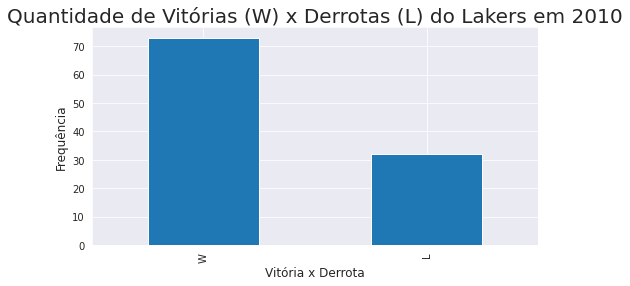

In [19]:
fig,ax = plt.subplots(figsize=(8,4))
nba[(nba["fran_id"] == "Lakers") &
    (nba["year_id"] == 2010)]["game_result"].value_counts().plot(kind="bar")
plt.title('Quantidade de Vitórias (W) x Derrotas (L) do Lakers em 2010', fontsize = 20)
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Vitória x Derrota', fontsize=12)
plt.show()

No ano de 2015, o time sensação da temporada foi o Golden State Warriors que, com as cestas de 3 pontos de Stephen Curry, se sagraram Campeões tendo o recorde de 15 derrotas e 67 vitórias na temporada regular (sem contar os jogos de _playoffs_). 

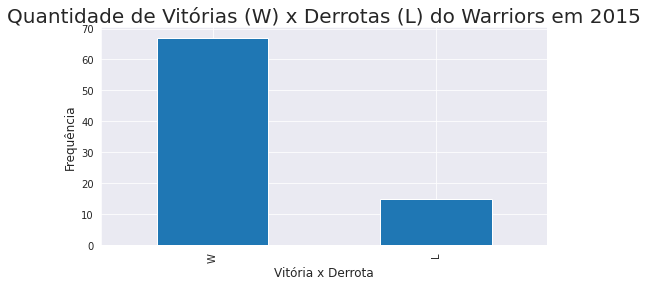

In [20]:
fig,ax = plt.subplots(figsize=(8,4))
nba[(nba["fran_id"] == "Warriors") & (nba["is_playoffs"] == 0) &
    (nba["year_id"] == 2015)]["game_result"].value_counts().plot(kind="bar")
plt.title('Quantidade de Vitórias (W) x Derrotas (L) do Warriors em 2015', fontsize = 20)
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Vitória x Derrota', fontsize=12)
plt.show()

E para finalizar este _notebook_ vamos ver quantos jogos cada franquia da NBA realizou até o ano de 2015.

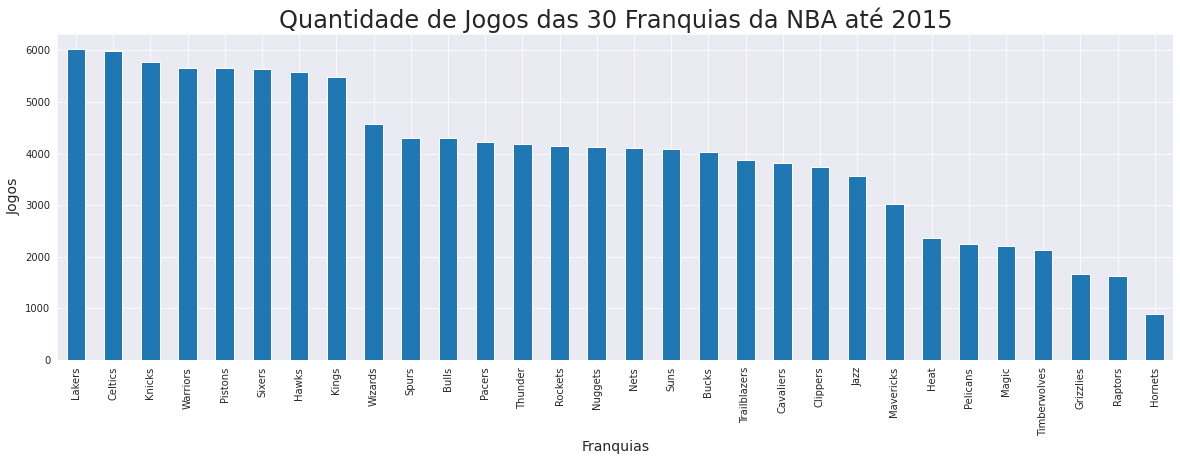

In [21]:
fig,ax = plt.subplots(figsize=(20,6))
nba["fran_id"].value_counts().head(30).plot(kind="bar")
plt.title('Quantidade de Jogos das 30 Franquias da NBA até 2015', fontsize = 24)
plt.ylabel('Jogos', fontsize=14)
plt.xlabel('Franquias', fontsize=14)
plt.show()

Claro que as franquias mais antigas (as primeiras do gráfico) fizeram mais jogos desde o início da NBA (contando os jogos da ABA quando é o caso). O número de jogos também é influenciado pelo número de partidas nos _playoffs_.